In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("2017.xlsx")

In [3]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2017,17229,311,14,3559
1,2017,17421,164,18,3543
2,2017,17660,95,20,3509
3,2017,17280,415,17,3517
4,2017,17057,286,33,3550
...,...,...,...,...,...
1807,2017,17562,260,36,3552
1808,2017,17600,111,35,3505
1809,2017,18046,284,14,3538
1810,2017,17992,131,20,3518


In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1812, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812 entries, 0 to 1811
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1812 non-null   int64
 1   Maximum length (m))  1812 non-null   int64
 2   Recession(m),        1812 non-null   int64
 3   Rate/yr(m)           1812 non-null   int64
 4   Snout altitude (m)   1812 non-null   int64
dtypes: int64(5)
memory usage: 70.9 KB


In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [7]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1812


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))


There are 5 numerical variables


In [9]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [10]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2017,17229,311,14,3559
1,2017,17421,164,18,3543
2,2017,17660,95,20,3509
3,2017,17280,415,17,3517
4,2017,17057,286,33,3550


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,0.0324,0.0008,-0.0039
"Recession(m),",NaN,0.0324,1.0000,-0.0199,-0.0030
Rate/yr(m),NaN,0.0008,-0.0199,1.0000,0.0382
Snout altitude (m),NaN,-0.0039,-0.0030,0.0382,1.0000


In [12]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Recession(m),          0.0324
Rate/yr(m)             0.0008
Snout altitude (m)    -0.0039
Year                      NaN
Name: Maximum length (m)), dtype: float64

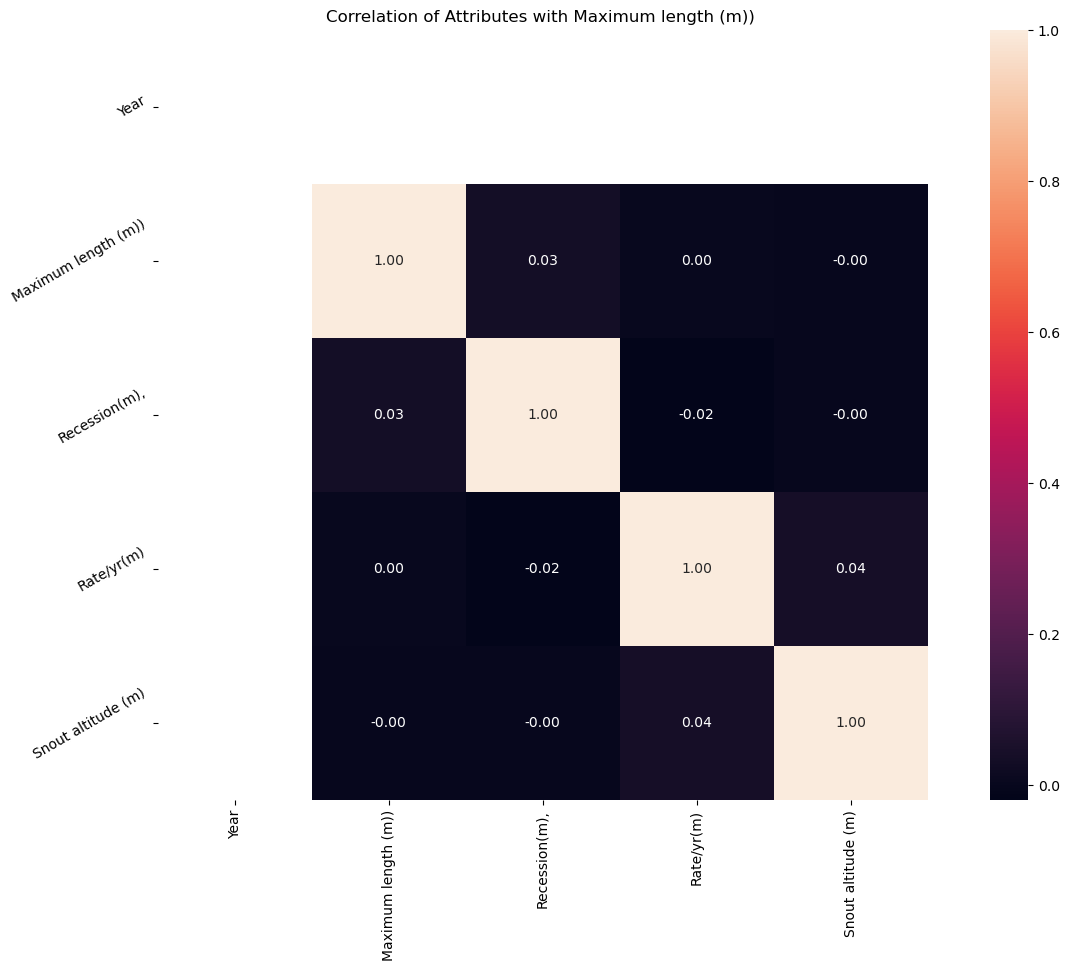

In [13]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [14]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [15]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,812.0000","1,812.0000","1,812.0000","1,812.0000","1,812.0000"
mean,"2,017.0000","17,552.2942",217.0110,27.6038,"3,532.6060"
std,0.0000,296.4805,127.7678,8.7626,20.8121
min,"2,017.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"2,017.0000","17,298.0000",105.0000,20.0000,"3,514.0000"
50%,"2,017.0000","17,552.0000",214.0000,28.0000,"3,533.0000"
75%,"2,017.0000","17,818.0000",329.0000,35.0000,"3,551.0000"
max,"2,017.0000","18,066.0000",440.0000,42.0000,"3,567.0000"


In [16]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2017   1.0000
Name: Year, dtype: float64

363   0.0055
351   0.0050
399   0.0050
145   0.0050
237   0.0050
       ...  
163   0.0006
89    0.0006
391   0.0006
337   0.0006
315   0.0006
Name: Recession(m),, Length: 434, dtype: float64

41   0.0403
38   0.0397
19   0.0375
31   0.0375
23   0.0370
13   0.0370
32   0.0370
18   0.0364
15   0.0353
20   0.0348
36   0.0348
29   0.0348
22   0.0342
40   0.0342
14   0.0342
39   0.0337
42   0.0331
25   0.0331
24   0.0326
30   0.0326
37   0.0315
35   0.0309
26   0.0309
28   0.0304
27   0.0304
16   0.0298
21   0.0281
34   0.0276
33   0.0270
17   0.0237
Name: Rate/yr(m), dtype: float64

3558   0.0221
3517   0.0182
3527   0.0182
3509   0.0177
3550   0.0177
        ...  
3560   0.0099
3543   0.0099
3528   0.0094
3507   0.0094
3496   0.0017
Name: Snout altitude (m), Length: 72, dtype: float64



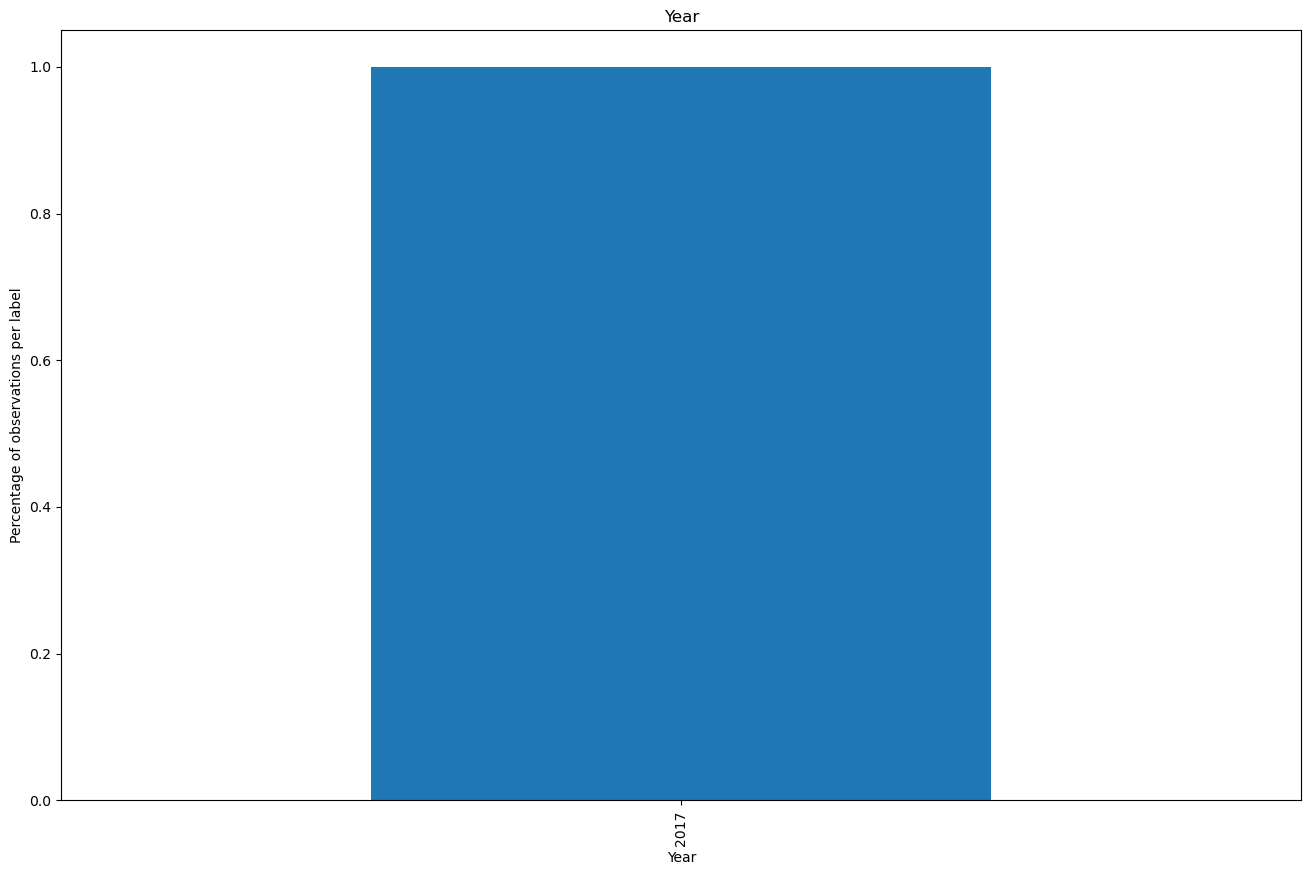

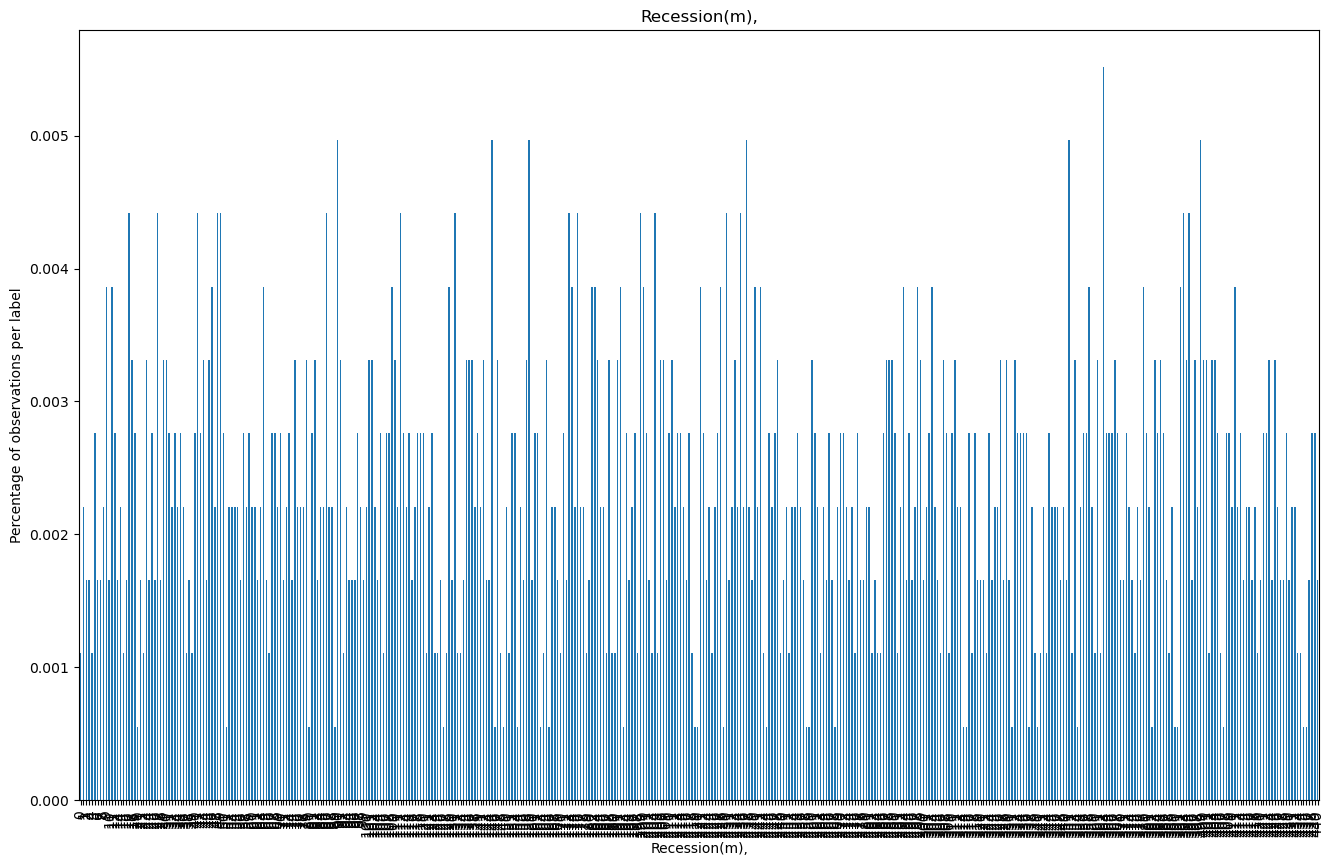

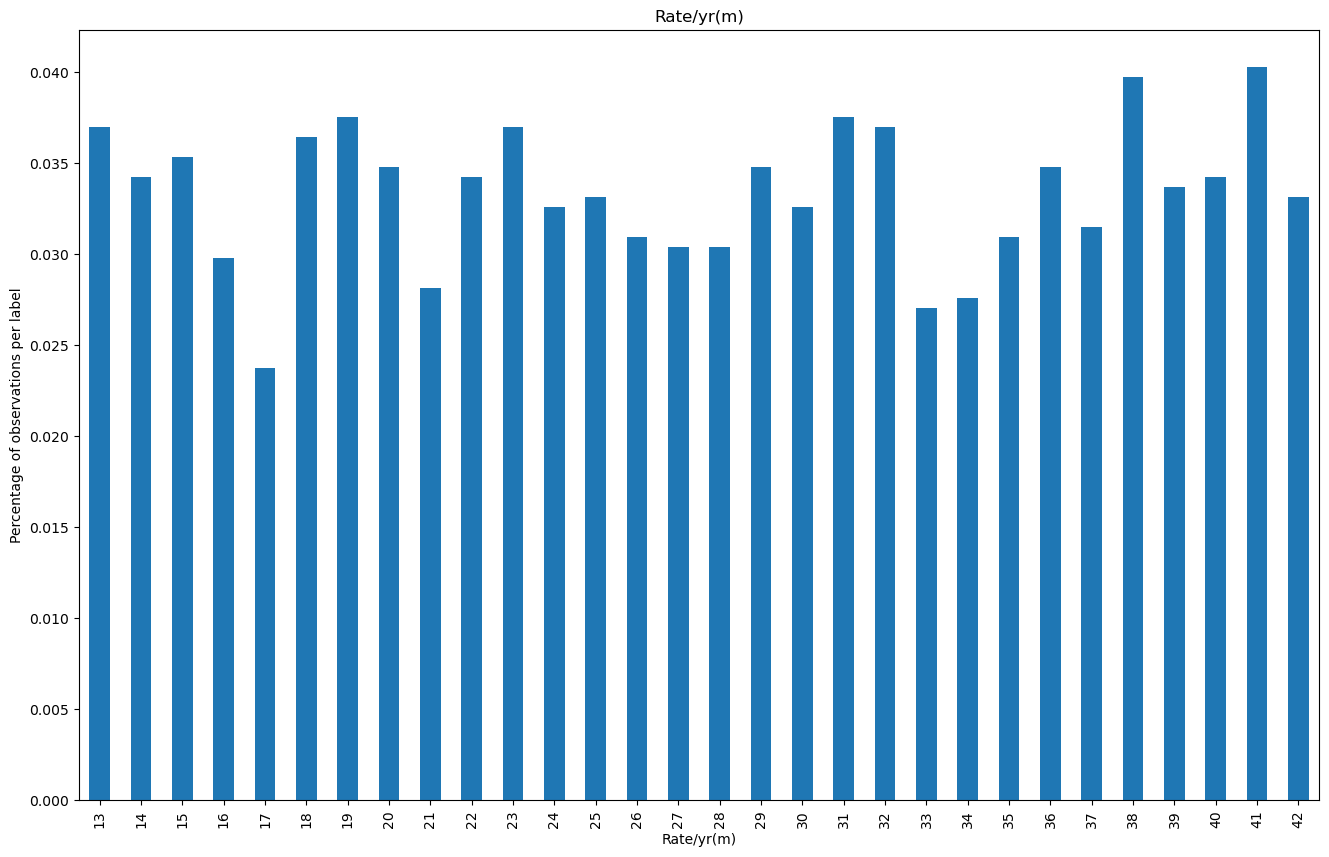

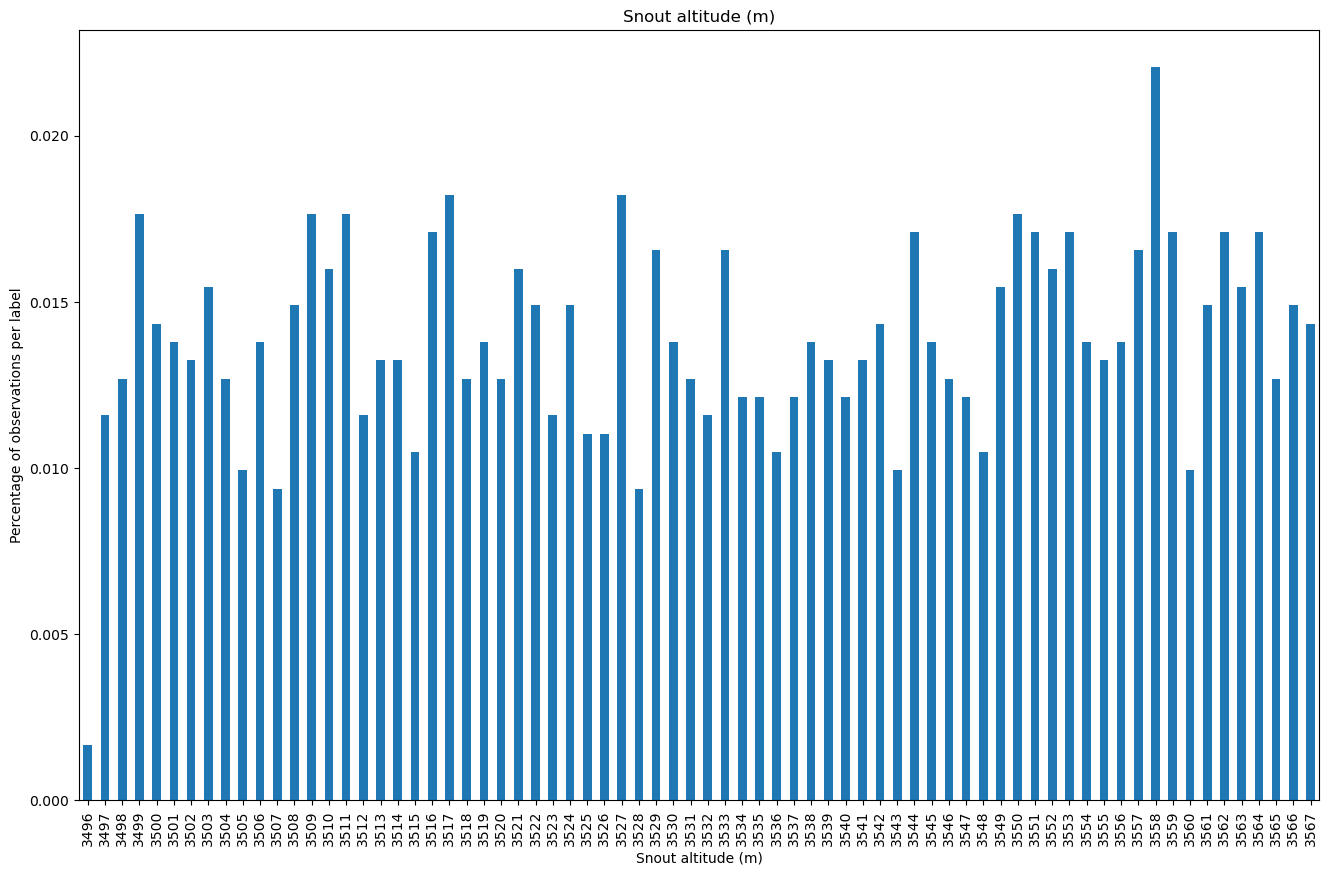

In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()